anscombe's quartet  

데이터의 통계적 수치는 같은데 시각화 했을때 달라지는 모양을 확인할 수 있음  
(평균, 표준편차, 상관계수가 같은 데이터)  

In [1]:
import seaborn as sns
%matplotlib inline
sns.set(style='ticks')

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset('anscombe')

In [2]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [3]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


데이터 갯수, 평균, 표준편차, 최솟값, 최대값, 4분위 확인

In [4]:
df[df['dataset'] == 'I'].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [5]:
df[df['dataset'] == 'II'].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [6]:
df[df['dataset'] == 'III'].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [7]:
df[df['dataset'] == 'IV'].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


피어슨 상관 계수  
두 변수의 공분산을 표준 편차의 곱으로 나눈 값

공분산  
확률변수 x, y에 대한 흩어짐을 분산으로 표현 가능 할 때 x, y 에 대해 공통적으로 나타내는 분산  
$$ Cov(X,Y) = \frac{\sum_{N}^{i=1}(X_i-\bar{X})(Y_i-\bar{Y})}{N}$$  

$$(공분산) = \frac{[((개별 X측정치)-(X의 평균) * ((개별 Y측정치)-(Y의 평균))]의 총 합}{조합을 이루는 개수} $$
$$ = \frac{[(X의 평균편차) * (Y의 평균편차)]의 총 합}{조합을 이루는 개수} $$

In [8]:
df[df['dataset'] == 'I'].corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


In [9]:
df[df['dataset'] == 'II'].corr()

,x,y
x,1.000000,0.816237
y,0.816237,1.000000


In [10]:
df[df['dataset'] == 'III'].corr()

,x,y
x,1.000000,0.816287
y,0.816287,1.000000


In [11]:
df[df['dataset'] == 'IV'].corr()

,x,y
x,1.000000,0.816521
y,0.816521,1.000000


데이터의 통계적 수치가 같음을 확인 할 수 있음 (최솟값, 최대값은 다름)

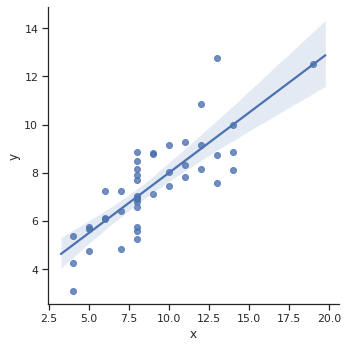

In [12]:
# 전체 데이터의 산점도와 회귀선 확인 가능
sns.lmplot(x='x', y='y', data=df)

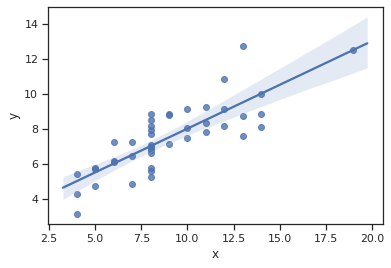

In [13]:
# regplot은 hue 옵션 사용 불가
sns.regplot(x='x', y='y', data=df)

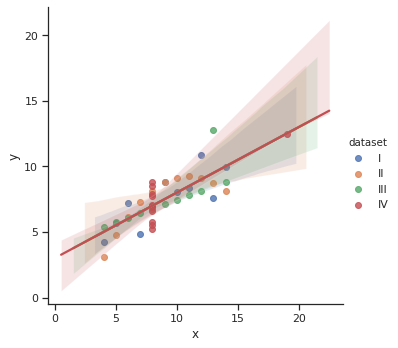

In [14]:
# hue : 데이터마다 회귀선 그리기 (그림자는 신뢰구간)
sns.lmplot(x='x', y='y', data=df, hue='dataset')

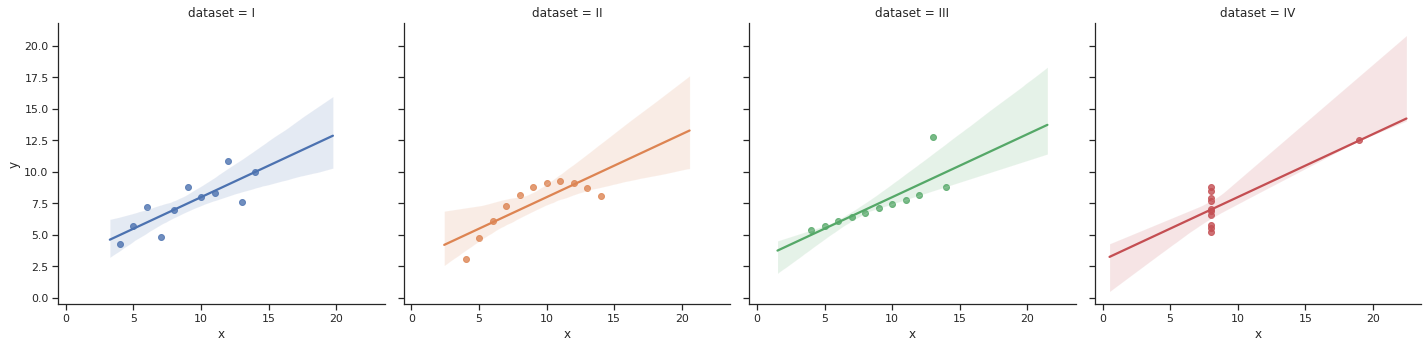

In [15]:
sns.lmplot(x='x', y='y', data=df, hue='dataset', col='dataset')

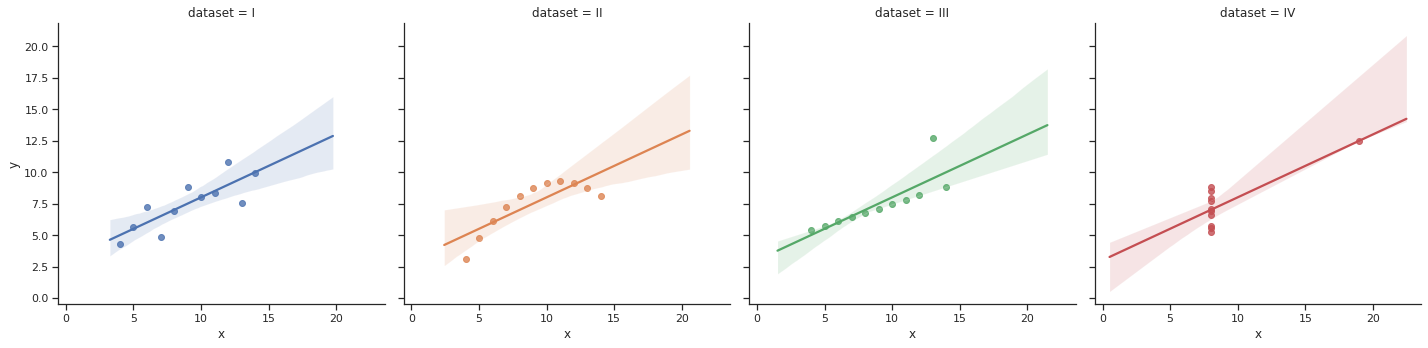

In [16]:
# ci : Size of the confidence interval for the regression estimate.
# 신뢰구간을 그릴지 말지
# 양극단의 값을 제외하고 신뢰구간을 표시하고 싶으면 보통 ci 95%를 사용
sns.lmplot(x='x', y='y', data=df, hue='dataset', col='dataset', ci=95)

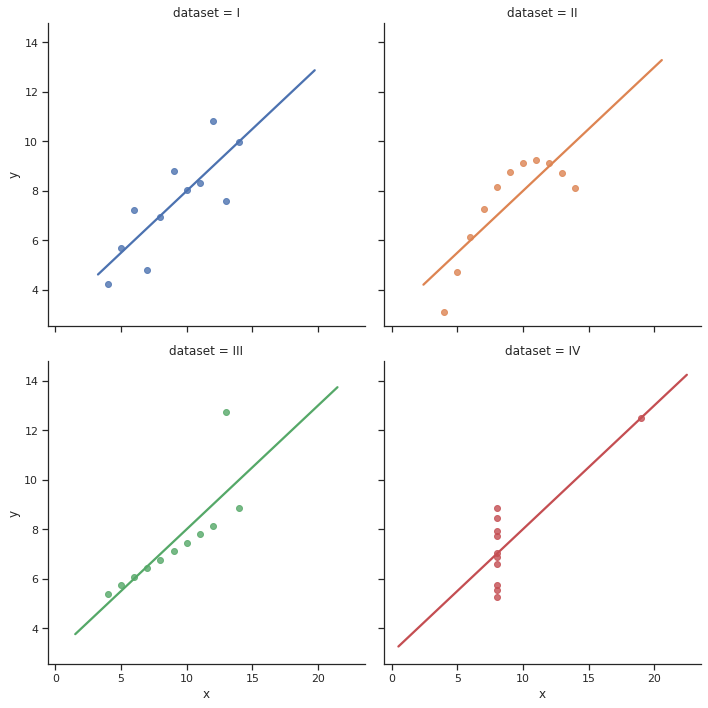

In [17]:
# col_wrap = 그릴 컬럼 갯수
sns.lmplot(x='x', y='y', data=df, hue='dataset', col='dataset', 
           col_wrap=2, ci=None)

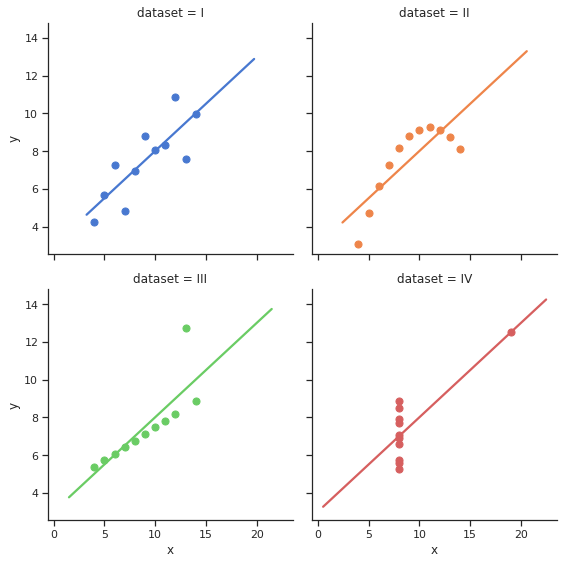

In [18]:
# Show the results of a linear regression within each dataset
# scatter_kws, s : 점의 크기, alpha : 점의 투명도
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=df,
          col_wrap=2, ci=None, palette='muted', height=4,
          scatter_kws={'s':50, 'alpha':1})

barplot subplot

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', context='talk')
%matplotlib inline

In [20]:
# RandomState를 호출하면 랜덤값이 고정됨
rs = np.random.RandomState(8)
rs

RandomState(MT19937) at 0x7F4B4D6D7380

In [21]:
x = np.array(list('ABCDEFGHIJ'))
x

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='<U1')

In [22]:
y1 = np.arange(1, 11)
y1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

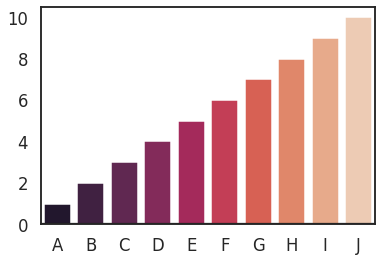

In [23]:
sns.barplot(x=x, y=y1, palette='rocket').axhline(0, color='k')

In [24]:
y2 = y1 - 5.5
y2

array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5])

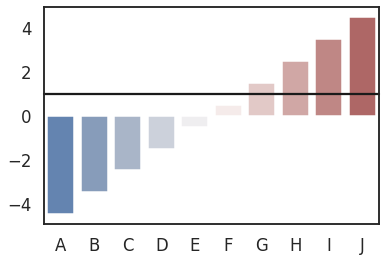

In [25]:
# axhline : 해당 값에 선이 생김
sns.barplot(x=x, y=y2, palette='vlag'
           ).axhline(1, color='k', clip_on=False)

In [26]:
y3 = rs.choice(y1, len(y1), replace=False)
y3

array([ 9,  7, 10,  1,  3,  6,  8,  2,  5,  4])

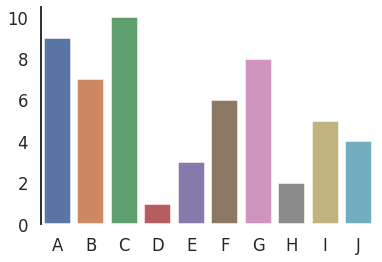

In [27]:
sns.barplot(x=x, y=y3)
sns.despine(bottom=True) # 테두리 사라짐

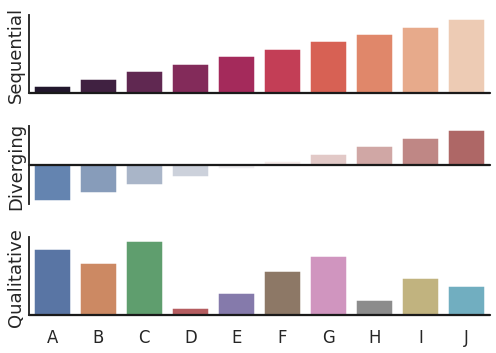

In [28]:
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list('ABCDEFGHIJ'))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette='rocket', ax=ax1)
ax1.axhline(0, color='k', clip_on=False)
ax1.set_ylabel('Sequential')

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette='vlag', ax=ax2)
ax2.axhline(0, color='k', clip_on=False)
ax2.set_ylabel('Diverging')

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette='deep', ax=ax3)
ax3.axhline(0, color='k', clip_on=False)
ax3.set_ylabel('Qualitative')

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

# distribution plot options (수치형 plot)

막대그래프의 밀도를 그린 plot (kdeplot)

히스토그램 : 도수 분포를 정보 그림으로 나타낸 것

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white', palette='muted', color_codes=True)

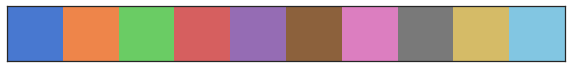

In [30]:
sns.palplot(sns.color_palette('muted'))

In [31]:
rs = np.random.RandomState(10)

# Generate a random univariate dataset (정규분포를 이루도록 100개의 숫자를 생성)
d = rs.normal(size=100)
print(len(d))
d[:5]

100


array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597])

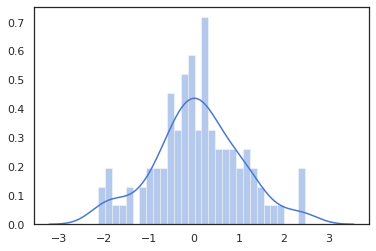

In [32]:
# bins : 막대 갯수
sns.distplot(d, bins=30)

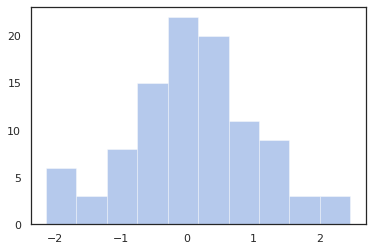

In [33]:
sns.distplot(d, kde=False)

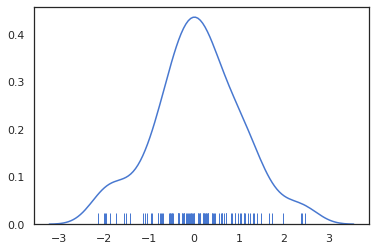

In [34]:
# 카펫의 실처럼 표시됨. 값이 어디에 더 몰려있는지 표시
sns.distplot(d, hist=False, rug=True)

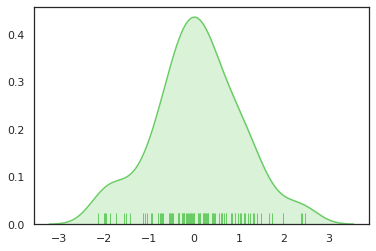

In [35]:
# shade : kde 안에 색상이 칠해짐
sns.distplot(d, hist=False, rug=True, color='g', kde_kws={'shade':True})

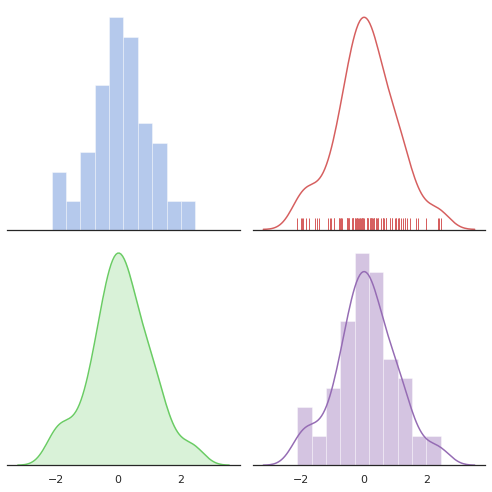

In [36]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True) # 테두리를 그리지 않음

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color='b', ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color='r', ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color='g', kde_kws={'shade':True}, ax=axes[1,0])

# Plot a histogram and kernel density estimate
sns.distplot(d, color='m', ax=axes[1, 1])

# ytick 그리지 않음
plt.setp(axes, yticks=[])
plt.tight_layout()

# violinplot  
수치형 데이터와 카테고리컬 데이터를 같이 비교할 때 사용

In [37]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [38]:
# Load the example tips dataset
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [39]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


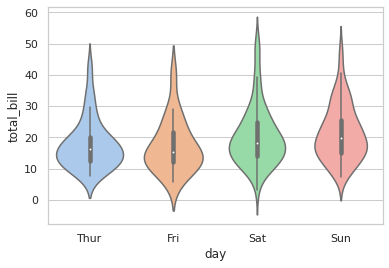

In [40]:
sns.violinplot(x='day', y='total_bill', data=tips)

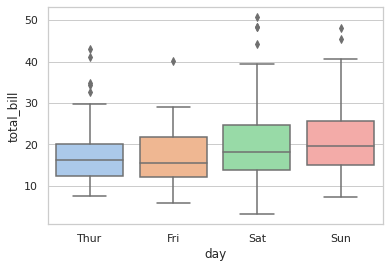

In [41]:
# 바이올린플롯과 비슷하지만 데이터의 분산을 표현하지 못함
sns.boxplot(x='day', y='total_bill', data=tips)

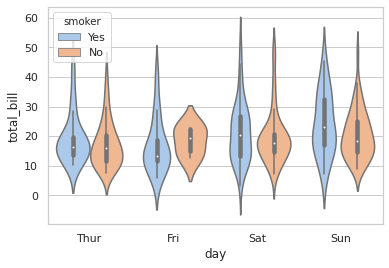

In [42]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker')

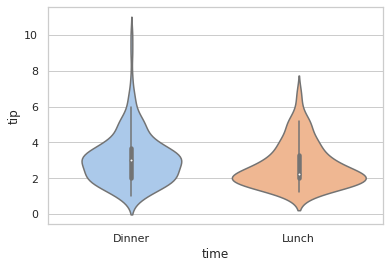

In [43]:
# order : 순서 지정 가능
sns.violinplot(x='time', y='tip', data=tips, order=['Dinner', 'Lunch'])

In [44]:
tips['weekend'] = tips['day'].isin(['Sat', 'Sun'])
tips.sample()

,total_bill,tip,sex,smoker,day,time,size,weekend
43,9.68,1.32,Male,No,Sun,Dinner,2,True


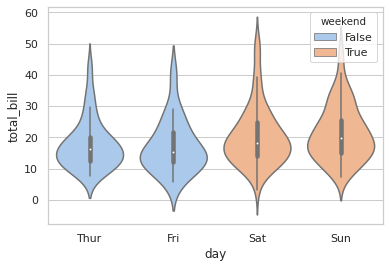

In [45]:
sns.violinplot(x='day', y='total_bill', hue='weekend', data=tips, dodge=False)

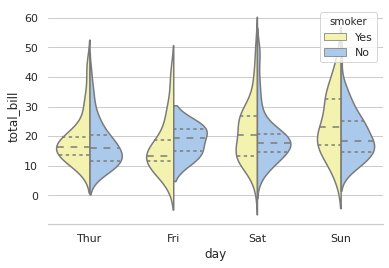

In [46]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=True, inner="quartile", # 4분위
               palette={"Yes": "y", "No": "b"},
               data=tips)
sns.despine(left=True)

In [47]:
import numpy as np
import seaborn as sns

In [48]:
sns.set(style='whitegrid')

In [49]:
# Create a random dataset across several variables
rs = np.random.RandomState(0)
n, p = 40, 8 # 행:40, 열:8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

In [50]:
import pandas as pd
pd.DataFrame(d).sample()

,0,1,2,3,4,5,6,7
33,6.12744,6.911821,5.554721,3.245372,1.331038,1.236003,1.068542,-5.942393


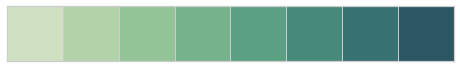

In [51]:
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
sns.palplot(pal)

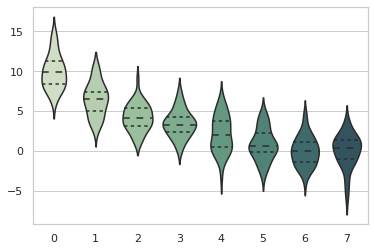

In [52]:
# Show each distribution with both violins and points
sns.violinplot(data=d, palette=pal, inner='quartile')

# swamplot  


categorical한 데이터의 산점도 표현  

x축 : categorical data  
y축 : numeric value

In [53]:
import pandas as pd
import numpy as np
sns.set(style='whitegrid', palette='muted')

In [54]:
# Load the example iris dataset
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
# 'Melt' the dataset to 'long-form' or 'tidy' representation
# 컬럼들을 하나의 데이터로 reshape 함
# setosa -> sepal_length -> 5.1 의 데이터 순으로 일일이 나열하게 변경함
iris = pd.melt(iris, 'species', var_name='measurement')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   species      600 non-null    object 
 1   measurement  600 non-null    object 
 2   value        600 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.2+ KB


In [57]:
iris.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


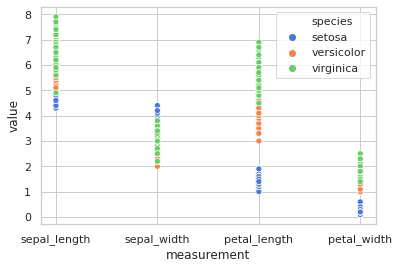

In [58]:
# scatterplot으로는 잘 표현이 안됨
# scatterplot을 categorical 하게 표현할 때 swarmplot을 사용
sns.scatterplot(x='measurement', y='value', hue='species', data=iris)

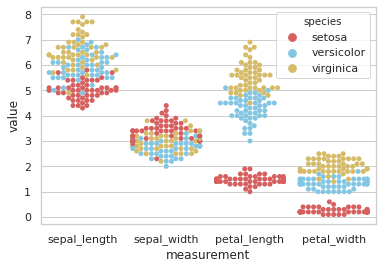

In [59]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x='measurement', y='value', hue='species', palette=['r', 'c', 'y'], data=iris)

In [60]:
tips = sns.load_dataset('tips')
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3


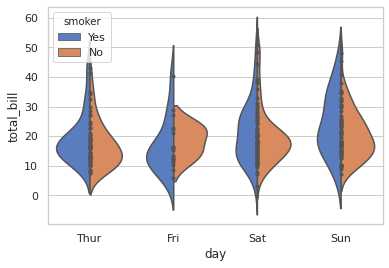

In [61]:
sns.violinplot(x='day', y='total_bill', hue='smoker', inner='point', data=tips, split=True)

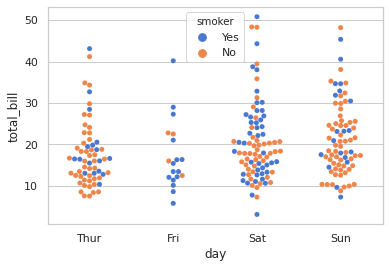

In [62]:
sns.swarmplot(x='day', y='total_bill', hue='smoker', data=tips)

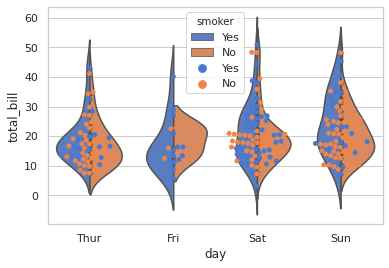

In [63]:
sns.violinplot(x='day', y='total_bill', hue='smoker', inner='point', data=tips, split=True)
sns.swarmplot(x='day', y='total_bill', hue='smoker', data=tips)

# lineplot  

수치형 데이터의 이동평균선

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')

In [65]:
rs = np.random.RandomState(365)
rs

RandomState(MT19937) at 0x7F4B4D6D79E0

In [66]:
values = rs.randn(365, 4).cumsum(axis=0)
values

array([[  0.16792113,   0.52350518,   0.81737553,   1.70384552],
       [ -1.97902642,   1.23770369,   0.05723019,   2.74326736],
       [ -2.94547836,   1.09402466,   1.62835461,   2.35998788],
       ...,
       [-20.16215347,   9.46658006, -10.38886875,  17.95576784],
       [-20.32296367,   9.63655141,  -7.97732518,  19.39724181],
       [-20.76771621,  11.01141408,  -7.94147579,  19.35811172]])

In [67]:
pd.DataFrame(values)

,0,1,2,3
0,0.167921,0.523505,0.817376,1.703846
1,-1.979026,1.237704,0.057230,2.743267
2,-2.945478,1.094025,1.628355,2.359988
3,-2.307479,0.749367,1.624072,2.518347
4,-3.270573,0.333310,1.867085,2.866550
...,...,...,...,...
360,-19.091161,11.538091,-12.324271,15.728471
361,-19.896686,9.886417,-11.185668,16.971170
362,-20.162153,9.466580,-10.388869,17.955768
363,-20.322964,9.636551,-7.977325,19.397242


In [68]:
# 2016/1/1부터 365개 날짜 값으로 데이터 지정해줌
dates = pd.date_range('1 1 2016', periods=365, freq='D')
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [69]:
data = pd.DataFrame(values, dates, columns=['A','B','C','D'])
data.head(1)

,A,B,C,D
2016-01-01,0.167921,0.523505,0.817376,1.703846


In [70]:
data.tail(1)

,A,B,C,D
2016-12-30,-20.767716,11.011414,-7.941476,19.358112


In [71]:
# 일주일 기간으로 이동평균값을 구함
data = data.rolling(7).mean()
data.head(14)

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN
2016-01-07,-2.452745,1.051882,0.869730,2.501669
2016-01-08,-2.947736,1.154990,0.861469,2.497520
2016-01-09,-3.321732,1.161639,1.080810,2.444158
2016-01-10,-3.469003,1.309605,1.126083,2.298421


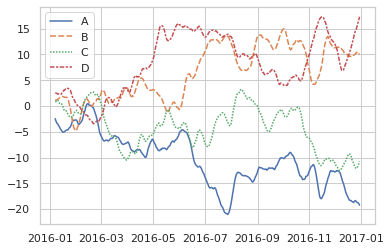

In [72]:
sns.lineplot(data=data)

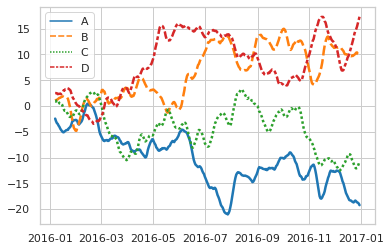

In [73]:
sns.lineplot(data=data, palette='tab10', linewidth=2.5)

# scatterplot  

x축, y축 모두 수치형데이터 일때 사용. 분포도나 이상치 확인

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

In [75]:
# Load the example iris dataset
diamonds = sns.load_dataset('diamonds')

In [76]:
diamonds.shape

(53940, 10)

In [77]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [78]:
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

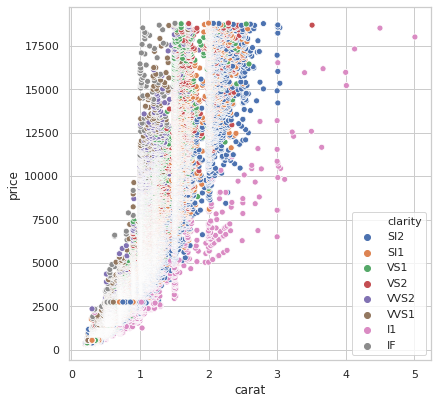

In [79]:
plt.figure(figsize=(6.5, 6.5)) # size 조절 가능
sns.scatterplot(data=diamonds, x='carat', y='price', hue='clarity')

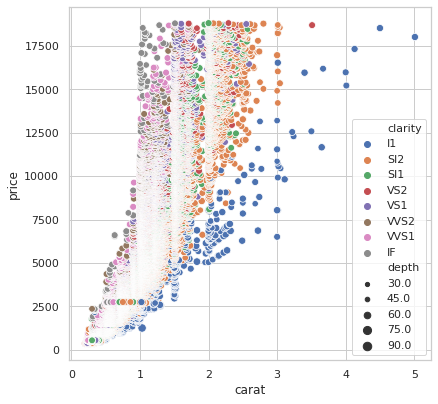

In [80]:
plt.figure(figsize=(6.5, 6.5)) # size 조절 가능
sns.scatterplot(data=diamonds, x='carat', y='price', 
                hue='clarity', hue_order=clarity_ranking,
                size='depth')

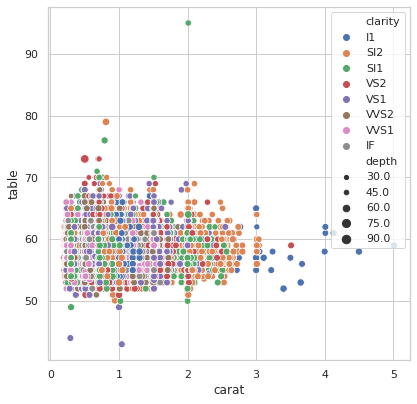

In [81]:
plt.figure(figsize=(6.5, 6.5)) # size 조절 가능

sns.scatterplot(data=diamonds, x='carat', y='table', 
                hue='clarity', hue_order=clarity_ranking,
                size='depth')

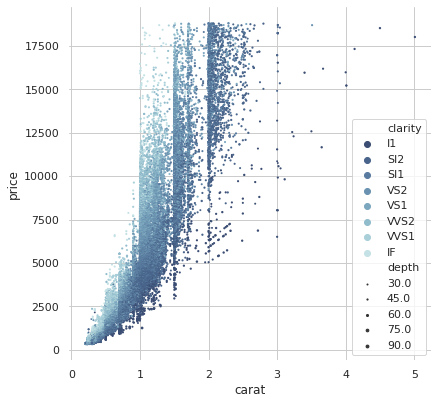

In [82]:
# Draw a scatter plot while assigning point colors and sizes to different variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

# clarity_ranking 대로 hue값의 order를 지정하는 옵션 값
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x='carat', y='price', 
               hue='clarity', size='depth',
               palette='ch:r=-.2, d=.3_r', hue_order=clarity_ranking,
               sizes=(1, 8), linewidth=0, data=diamonds, ax=ax)

# boxen plot  

Plotting large distributions

In [83]:
import seaborn as sns
import pandas as pd

sns.set(style='whitegrid')

In [84]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [85]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


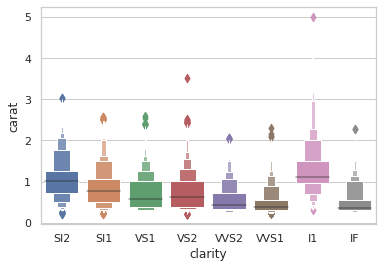

In [86]:
# box에 그려진 선은 medium값 (4분위중 2분위 값)을 의미함
sns.boxenplot(data=diamonds, x='clarity', y='carat')

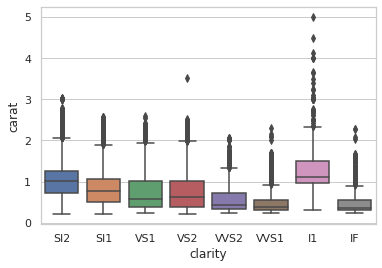

In [87]:
# boxplot 보다 boxenplot이 수염 구간에 분포를 보기가 쉬운 장점이 있음
sns.boxplot(data=diamonds, x='clarity', y='carat')

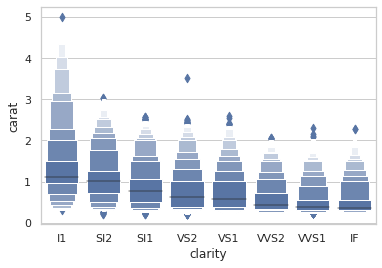

In [88]:
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.boxenplot(x='clarity', y='carat', color='b', order=clarity_ranking, scale='linear', data=diamonds)

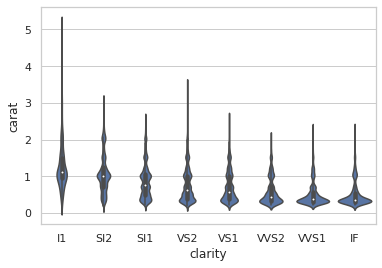

In [89]:
# violinplot은 distplot을 세로로 세우기 때문에 값이 어느 범위에 몰려있는지 확인이 가능함
sns.violinplot(x='clarity', y='carat', color='b', order=clarity_ranking, data=diamonds)

raw 데이터가 달라지더라도 boxplot으로 표현하면 똑같은 형태로 표현이 되는 데이터들이 있음  
https://autodeskresearch.com/publications/samestats  
이런 raw 데이터를 볼 때 boxplot 외에 boxenplot, violinplot으로는 달라진 형태로 볼 수 있음  
(해당 plot은 distribution을 표현 하기 때문)

# residplot  

plotting model residuals  
선형 회귀 예측 시 오차를 확인하는 그래프  

lowess : locally weighted robust scatterplot smoothing의 약자

In [90]:
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

In [91]:
# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

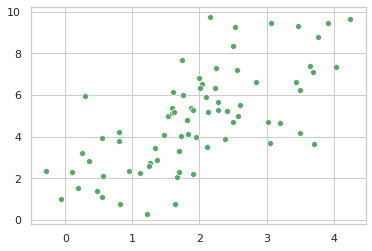

In [92]:
sns.scatterplot(x=x, y=y, color='g')

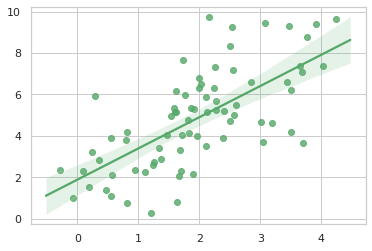

In [93]:
# 산점도 + 회귀선
sns.regplot(x=x, y=y, color='g')

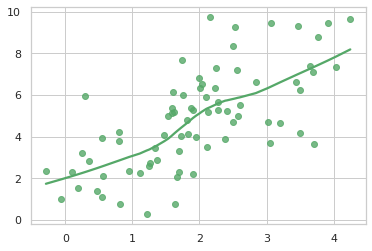

In [94]:
# lowess:locally weighted robust scatterplot smoothing (국소 가중 선형 회귀)
# robust의 의미:이상치에 대해 회귀선이 저항력을 가짐

sns.regplot(x=x, y=y, lowess=True, color='g')

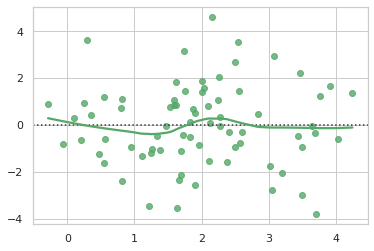

In [95]:
# Plot the residuals after fitting a linear model
# 회귀선에 대한 오차가 얼마나 되는지 확인하는 plot
sns.residplot(x, y, lowess=True, color="g")

# heatmap  

plotting a diagonal correlation matrix  

상관분석  
두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는 지를 분석하는 방법. 두변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이 때 두 변수간의 관계의 강도를 상관관계라 함.  
상관 계수는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것이 아님

- 피어슨 상관 계수  
  두 변수간의 관련성을 구하기 위해 보편적으로 이용됨  
$$ r = \frac{X와 Y가 함께 변하는 정도}{X와 Y가 각각 변하는 정도}$$
- 결과의 해석  
  r 값은 X와 Y가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일하면 -1  
  결정계수(coefficient of determination)은 $r^2$로 계산하며 이것은 X로부터 Y를 예측 할 수 있는 정도를 의미함
  
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,  
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,  
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,  
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,  
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,  
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,  
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계  

In [96]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white')

In [97]:
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)), columns=list(ascii_letters[26:]))
d

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,...,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,...,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707
2,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,1.054113,-0.615562,...,-1.120717,0.991136,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524
3,-0.292821,0.856582,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,...,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,0.150722,0.017747,0.006885,0.329035
4,-0.587376,1.751572,0.308274,-0.894283,-0.769156,0.869197,0.371381,-0.628362,-0.922477,-0.903391,...,1.519031,0.749896,-2.269087,-0.760599,-0.955502,0.923951,0.315157,1.340910,0.678992,0.594258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.036298,-1.177101,-2.472118,-0.370044,0.108184,-0.753487,-0.331042,2.203373,-0.319100,0.428793,...,-0.087225,0.190644,-0.506678,-0.442679,-1.186259,0.743655,-1.842236,0.702369,-0.726212,-0.792110
96,-0.681074,2.203923,1.555724,-0.808559,-1.415792,0.586590,0.393986,0.455118,-0.050184,1.298277,...,-0.607768,0.051741,-1.183910,0.830444,0.911260,-1.470621,-0.450259,-1.146024,-0.548446,-0.016534
97,0.616011,0.162773,-0.425326,2.040243,0.339979,0.489751,1.030780,1.061831,-0.040148,-1.406366,...,-1.248445,-0.530126,-0.045328,1.314023,-0.203060,0.767502,2.055105,-0.131154,-1.185281,-0.208766
98,-1.268506,-0.815121,-1.670919,-1.103345,-1.348075,0.157345,0.249971,0.581991,0.115223,-0.898088,...,0.227623,-0.147131,0.692395,-1.308567,-1.197288,-1.348862,-1.612158,0.968366,-0.936233,-0.733935


In [98]:
# Compute the correlation matrix
corr = d.corr()

In [99]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[:, 2]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

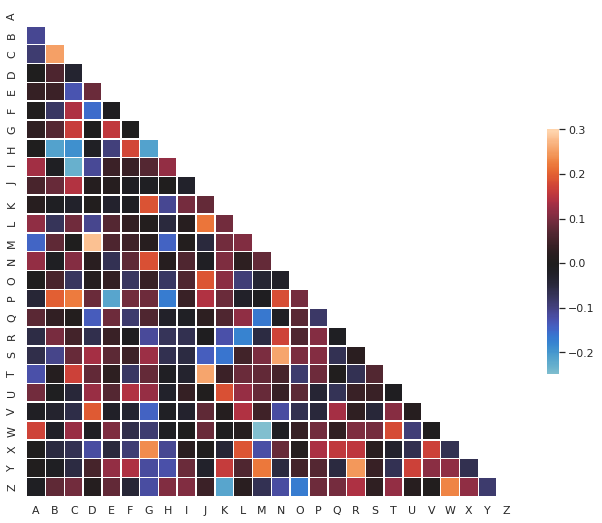

In [100]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# KDE plots  

multiplt bivariate KDE plots  
데이터가 위도와 경도라면 산의 등고선, 바다의 깊이 등을 표현 가능  
수치형 데이터의 밀도 표현 가능

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

In [102]:
iris = sns.load_dataset('iris')
print(iris.shape)

(150, 5)


In [103]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [104]:
# Subset the iris datset by species
setosa = iris.query('species == "setosa"')
virginica = iris.query('species == "virginica"')

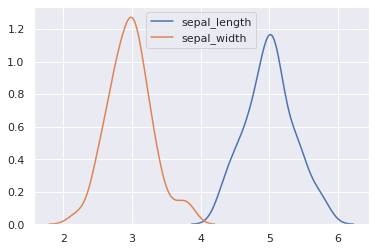

In [105]:
sns.kdeplot(setosa['sepal_length'])
sns.kdeplot(virginica['sepal_width'])

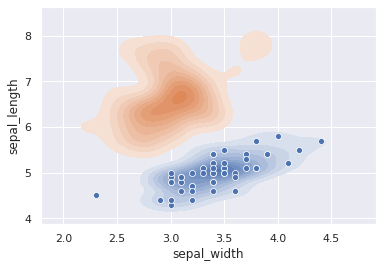

In [106]:
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], shade=True,
           shade_lowest=False)
sns.scatterplot(data=setosa, x='sepal_width', y='sepal_length')
sns.kdeplot(virginica['sepal_width'], virginica['sepal_length'],
           shade=True, shade_lowest=False)

Text(3.8, 4.5, 'setosa')

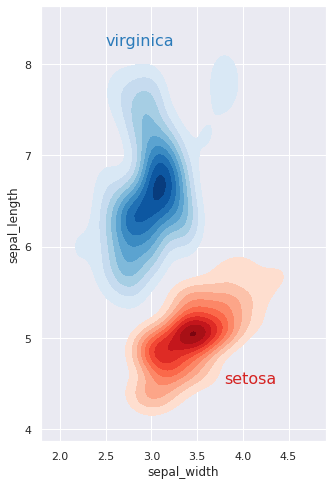

In [107]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                cmap='Reds', shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                cmap='Blues', shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette('Reds')[-2]
blue = sns.color_palette('Blues')[-2]

ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, 'setosa', size=16, color=red)

# Catplot  

categorical한 값을 plot 함  
three-way ANOVA

- 분산 분석 (analysis of variance, ANOVA, 변량 분석)  
  두 개 이상 다수의 집단을 비교하고자 할 때 집단 내의 분산, 총평균과
  각 집단의 평균의 차이에 의해 생긴 집단 간 분산의 비교를 통해 만들어진 F분포를
  이용하여 가설검정을 하는 방법

In [108]:
import seaborn as sns
sns.set(style='whitegrid')

In [109]:
# Load the example exercise dataset
df = sns.load_dataset('exercise')

In [110]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [111]:
df.kind.value_counts()

running    30
walking    30
rest       30
Name: kind, dtype: int64

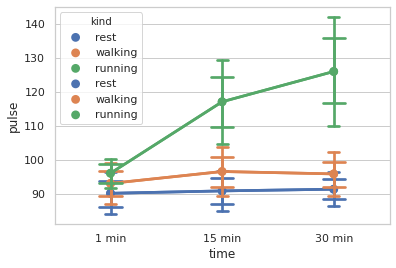

In [112]:
# 먼저 pointplot
sns.pointplot(data=df, x='time', y='pulse', hue='kind', capsize=.2)
sns.pointplot(data=df, x='time', y='pulse', hue='kind', 
              ci='sd', capsize=.1) # ci : sd 는 표준편차를 그림

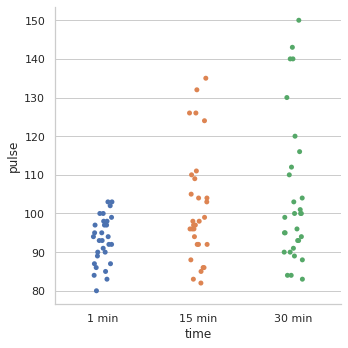

In [113]:
# swarmplot 과 비슷함
sns.catplot(data=df, x='time', y='pulse')

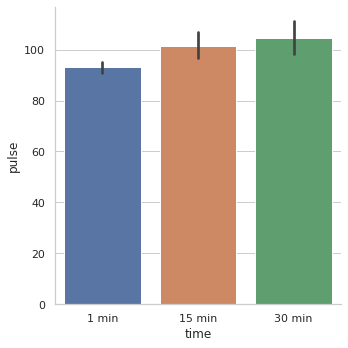

In [114]:
sns.catplot(data=df, x='time', y='pulse', kind='bar')

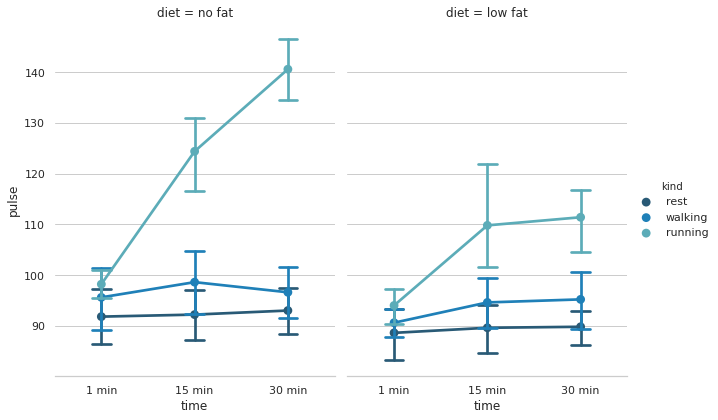

In [115]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x='time', y='pulse', hue='kind', col='diet',
               capsize=.2, palette='YlGnBu_d', height=6, aspect=.75,
               kind='point', data=df)
g.despine(left=True)

# Paired density and scatterplot matrix

In [116]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")

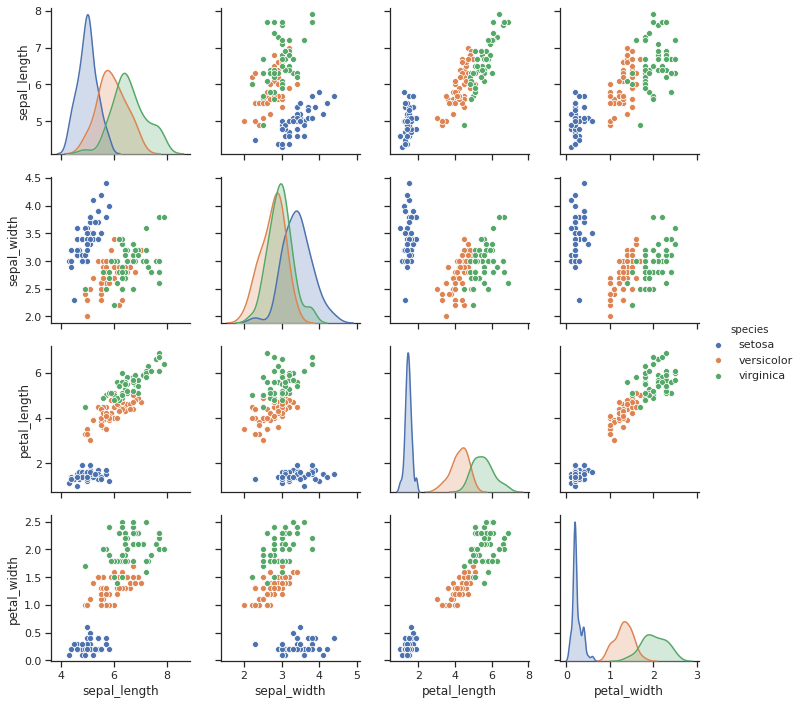

In [117]:
sns.pairplot(df, hue="species")

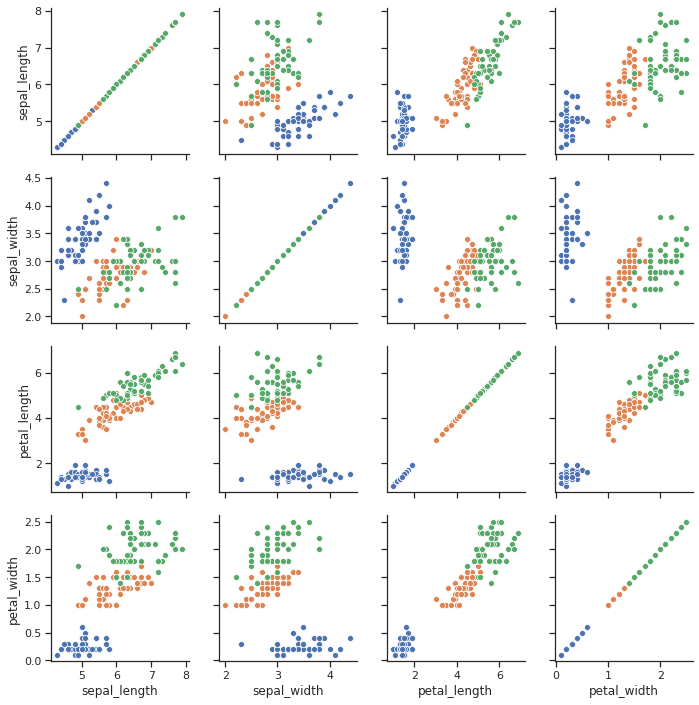

In [118]:
g = sns.PairGrid(df, hue='species', diag_sharey=False)
g.map(sns.scatterplot)

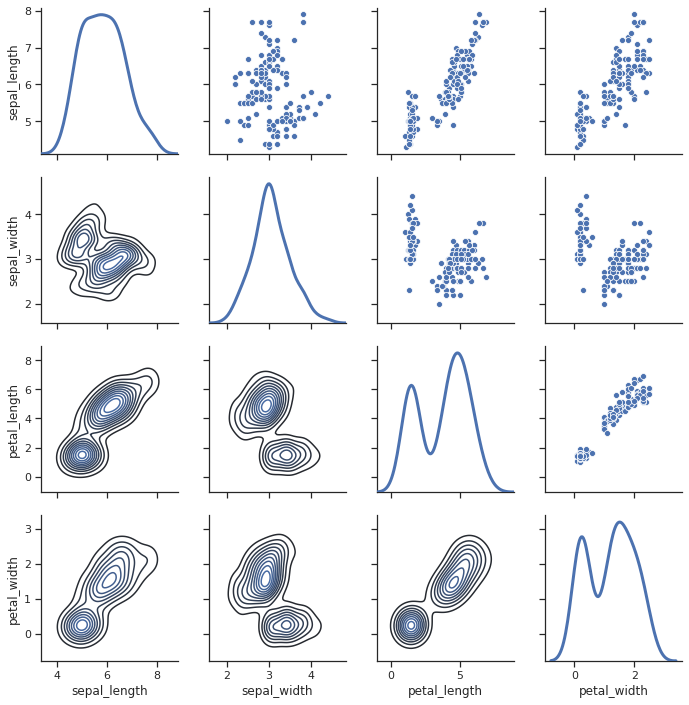

In [119]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

# countplot

In [120]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset('titanic')

In [121]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


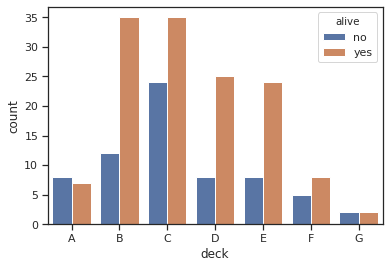

In [122]:
# deck 별 alive 여부를 빈도수를 시각화 함
sns.countplot(data=df, x='deck', hue='alive')

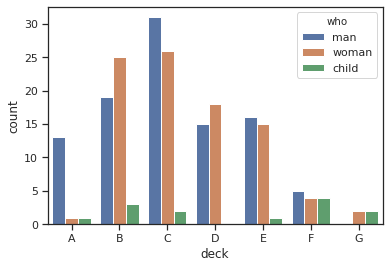

In [123]:
# deck 별 빈도수를 시각화. class 별로 다른 색상으로 표시되게 함
sns.countplot(data=df, x='deck', hue='who')

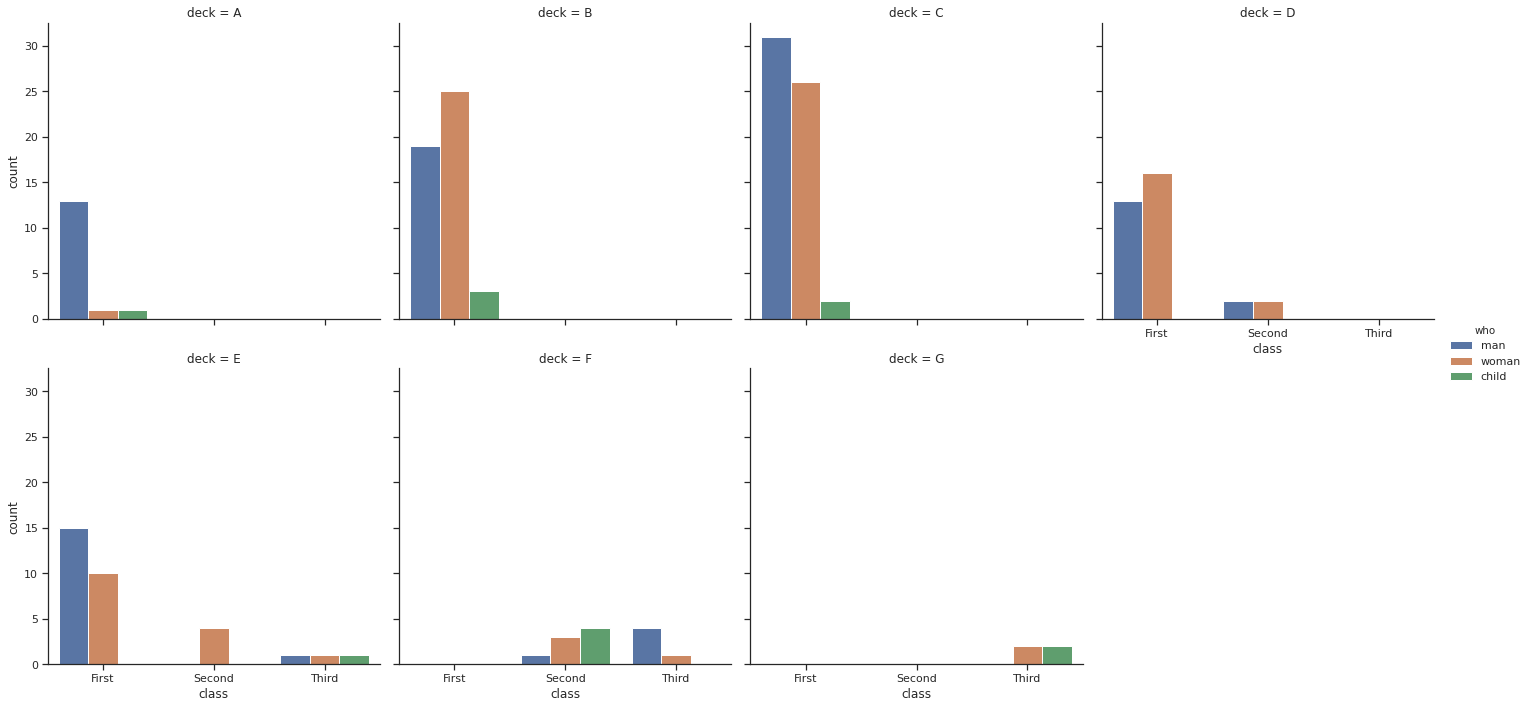

In [124]:
# 다변량 subplot
# col_wrap : 한줄에 그릴 갯수 지정
sns.catplot(data=df, x='class', kind='count', hue='who', col='deck', col_wrap=4)

# Plotting with categorical data

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)

In [126]:
tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


Categorical scatterplots:  

- stripplot() (with kind="strip"; the default)

- swarmplot() (with kind="swarm")


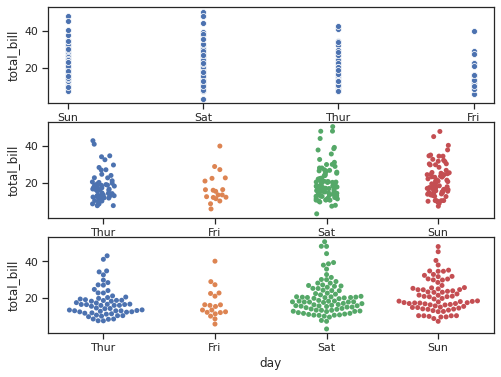

In [127]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
sns.scatterplot(data=tips, x='day', y='total_bill', ax=ax[0])
sns.stripplot(data=tips, x='day', y='total_bill', ax=ax[1])
sns.swarmplot(data=tips, x='day', y='total_bill', ax=ax[2])

Categorical distribution plots:  

- boxplot() (with kind='box')
- violinplot() (with kind="violin")
- boxenplot() (with kind='boxen')

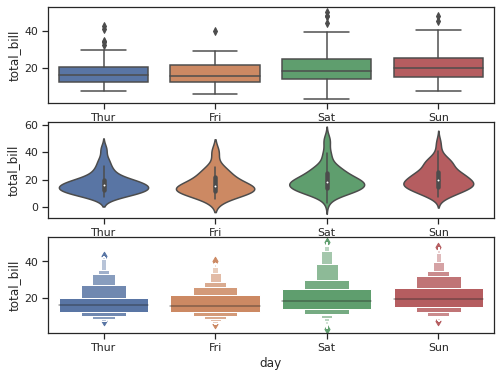

In [128]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
sns.boxplot(data=tips, x='day', y='total_bill', ax=ax[0])
sns.violinplot(data=tips, x='day', y='total_bill', ax=ax[1])
sns.boxenplot(data=tips, x='day', y='total_bill', ax=ax[2])

Categorical estimate plots:

- pointplot() (with kind="point")
- barplot() (with kind="bar")
- countplot() (with kind="count")

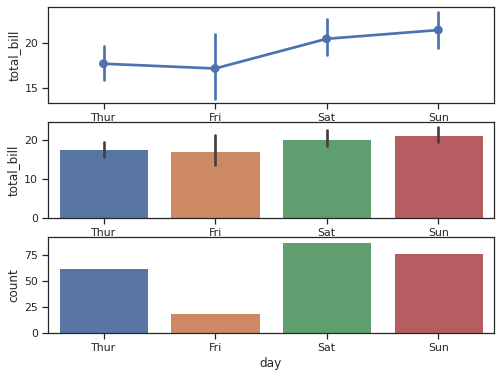

In [129]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))
sns.pointplot(data=tips, x='day', y='total_bill', ax=ax[0])
sns.barplot(data=tips, x='day', y='total_bill', ax=ax[1])
sns.countplot(data=tips, x='day', ax=ax[2])

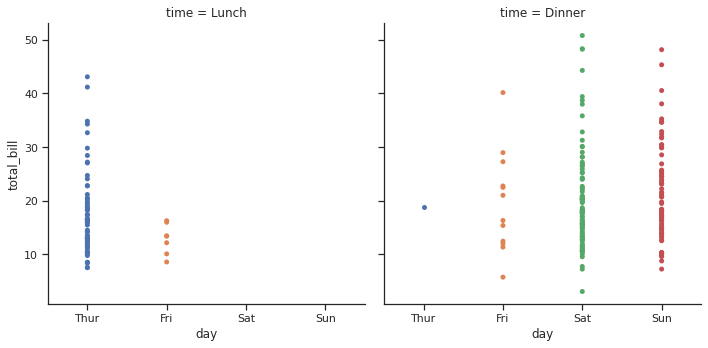

In [130]:
sns.catplot(data=tips, x='day', y='total_bill', col='time', jitter=False)

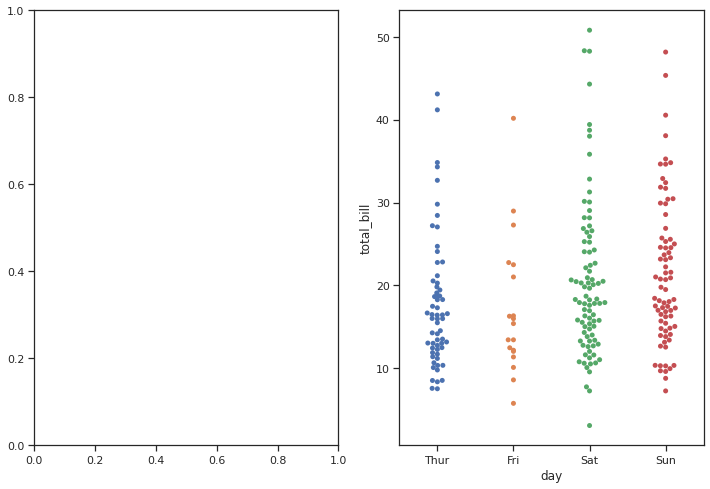

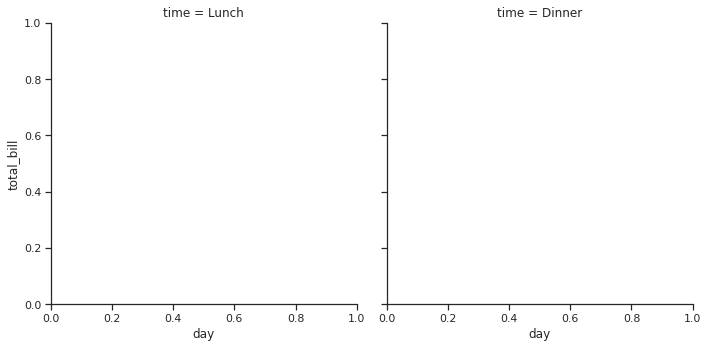

In [131]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
sns.catplot(data=tips, x='day', y='total_bill', col='time', kind='swarm', ax=ax[1])

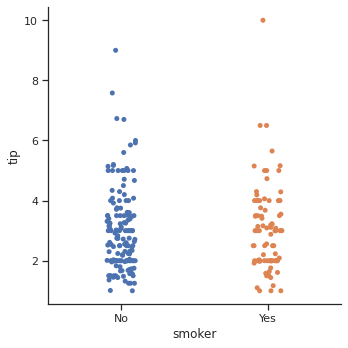

In [132]:
sns.catplot(x='smoker', y='tip', order=['No', 'Yes'], data=tips)

In [133]:
group = tips.groupby(['day'])['total_bill'].describe()
group

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


In [134]:
# 이상치
Thur = group.loc['Thur'] # Series 형태로 반환

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [135]:
#IQR은 Inter Quatile Range의 약자로 Q1과 Q3의 범위, 즉 차이를 말함.
IQR = Thur['75%'] - Thur['25%']
Thur_min = Thur['25%'] - (1.5 * IQR)
Thur_max = Thur['75%'] + (1.5 * IQR)
IQR, Thur_min, Thur_max

(7.712500000000002, 0.8737499999999958, 31.723750000000003)

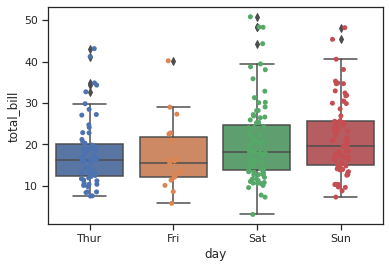

In [136]:
sns.stripplot(x='day', y='total_bill', data=tips)
sns.boxplot(x='day', y='total_bill', data=tips)

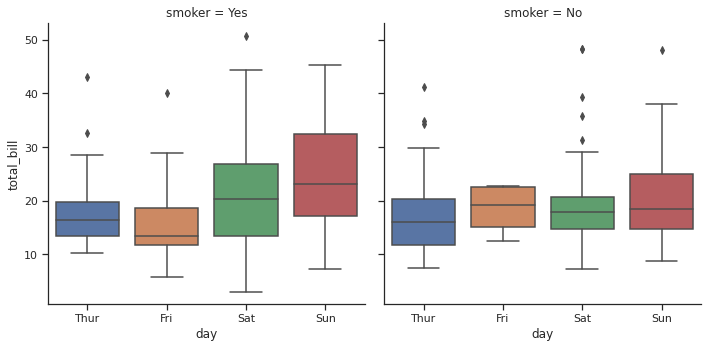

In [137]:
# catplot과 boxplot의 차이는 col을 지정해서 subplot을 그릴수 있음
sns.catplot(x='day', y='total_bill', kind='box', data=tips, col='smoker')

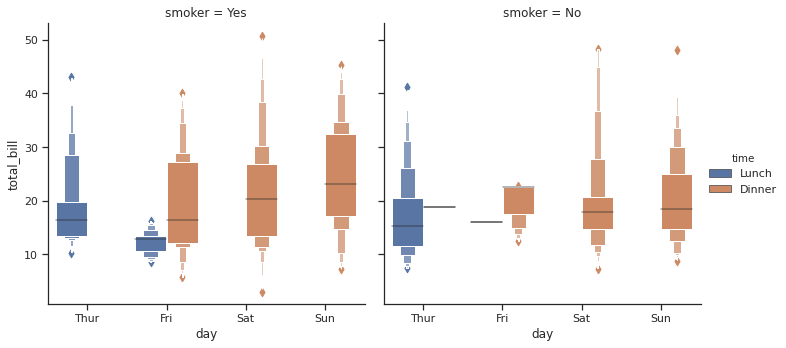

In [138]:
sns.catplot(x='day', y='total_bill', kind='boxen', data=tips, col='smoker', hue='time')

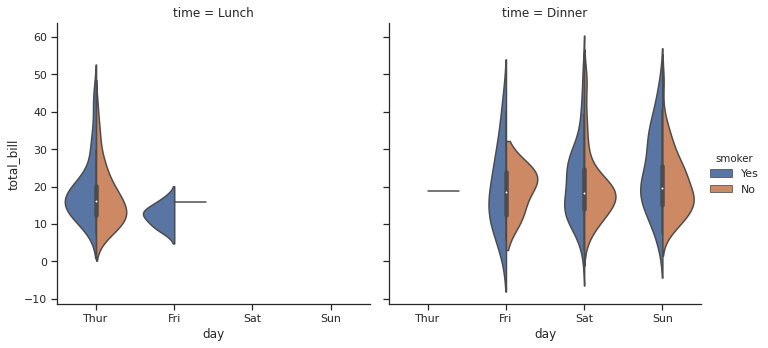

In [139]:
sns.catplot(x='day', y='total_bill', kind='violin', hue='smoker',
            split=True, # 양쪽을 그리지 않고 각자 부분만 그리게 하는 옵션
            data=tips, col='time')

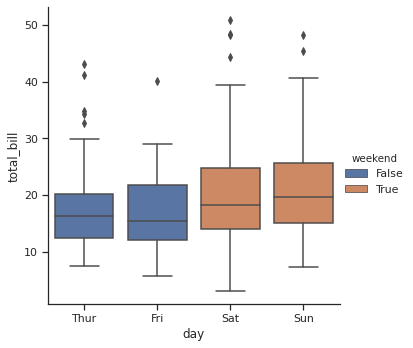

In [140]:
# 주말 여부에 따라서
tips['weekend'] = tips['day'].isin(['Sat', 'Sun'])
sns.catplot(x='day', y='total_bill', hue='weekend',
           kind='box', dodge=False, data=tips)

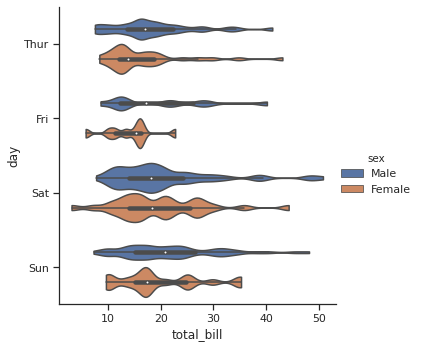

In [141]:
# bw, cut : bandwidth 값. 바이올린을 좀 더 자세하게 표현
sns.catplot(x='total_bill', y='day', hue='sex',
           kind='violin', bw=.15, cut=0,
           data=tips)

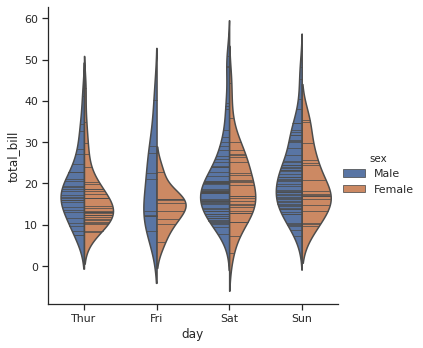

In [142]:
# inner='stick' : rugplot처럼 바이올린 안에 밀도 표시 가능
sns.catplot(x='day', y='total_bill', hue='sex', inner='stick',
           kind='violin', split=True, data=tips)

# Statistical estimation within categories

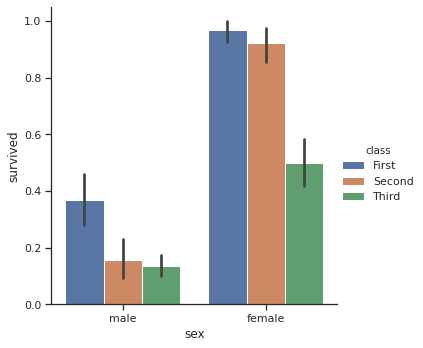

In [143]:
titanic = sns.load_dataset('titanic')
sns.catplot(x='sex', y='survived', hue='class', kind='bar', data=titanic)

In [144]:
titanic_group = titanic.groupby(['sex', 'class'])['survived'].mean()
titanic_group = titanic_group.unstack()
titanic_group

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


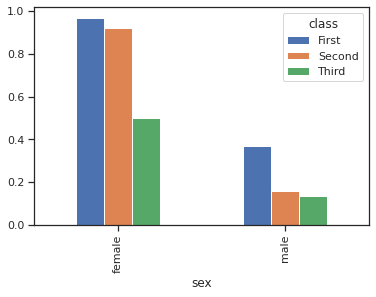

In [145]:
titanic_group.plot.bar()

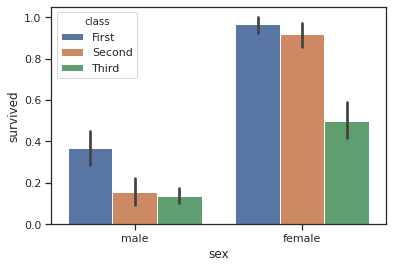

In [146]:
sns.barplot(x='sex', y='survived', hue='class', data=titanic)

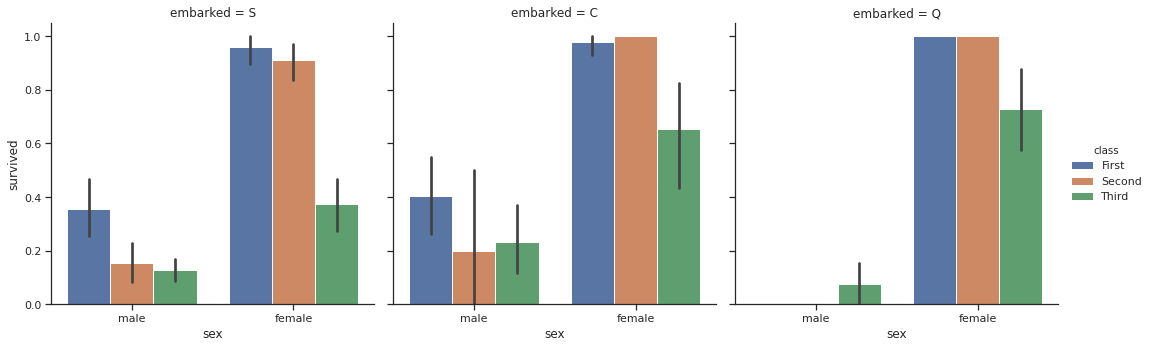

In [147]:
sns.catplot(x='sex', y='survived', hue='class', kind='bar', data=titanic,
           col='embarked')

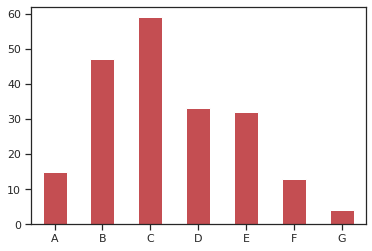

In [148]:
titanic['deck'].value_counts().sort_index().plot.bar(rot=0, color='r')

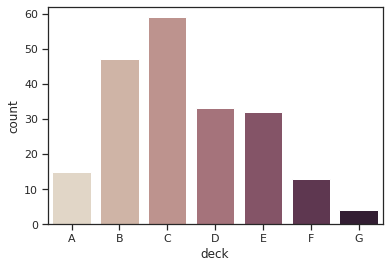

In [149]:
sns.countplot(x='deck', palette='ch:.25', data=titanic)

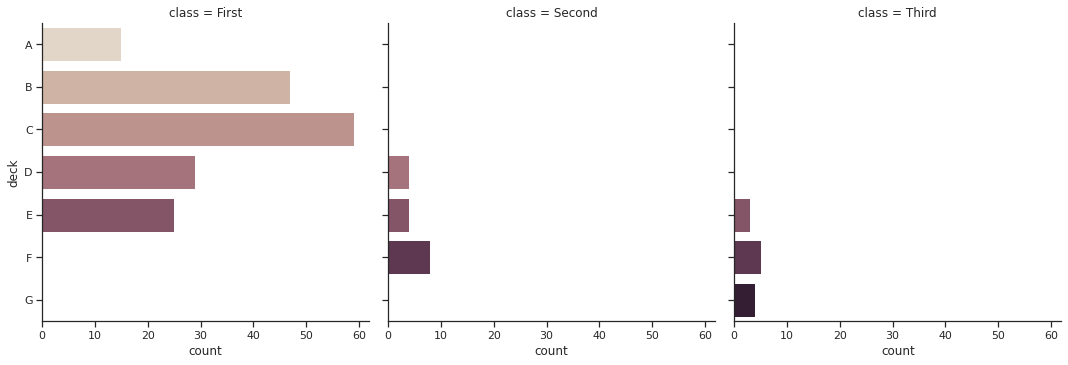

In [150]:
sns.catplot(y='deck', kind='count', palette='ch:.25', data=titanic, col='class')

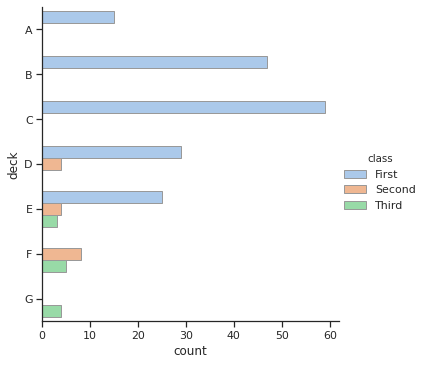

In [151]:
sns.catplot(y='deck', hue='class', kind='count',
           palette='pastel', edgecolor='.6', data=titanic)

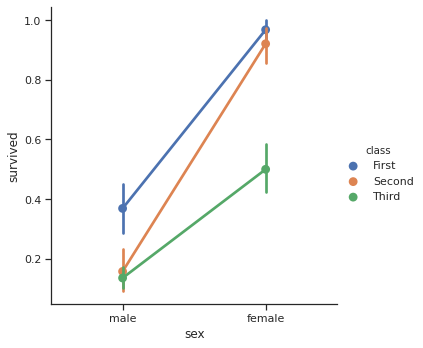

In [152]:
sns.catplot(x='sex', y='survived', hue='class', kind='point', data=titanic)

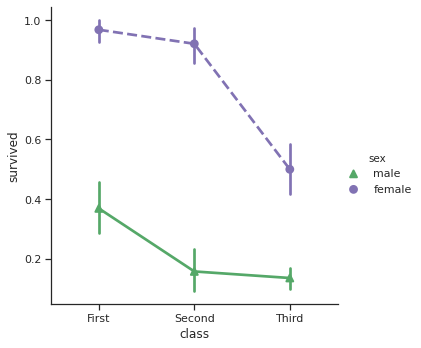

In [153]:
sns.catplot(x='class', y='survived', hue='sex', 
           palette={'male':'g', 'female':'m'},
           markers=['^', 'o'], linestyles=['-', '--'],
           kind='point', data=titanic)

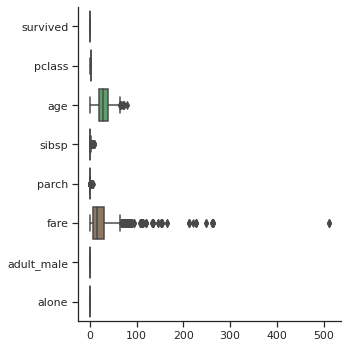

In [154]:
# 모든 데이터 그릴때
sns.catplot(data=titanic, orient='h', kind='box')

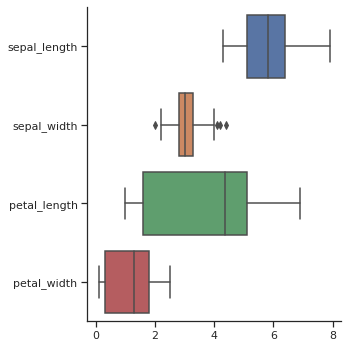

In [155]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box")

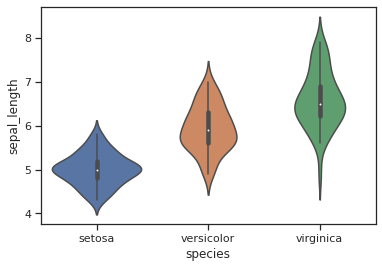

In [156]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

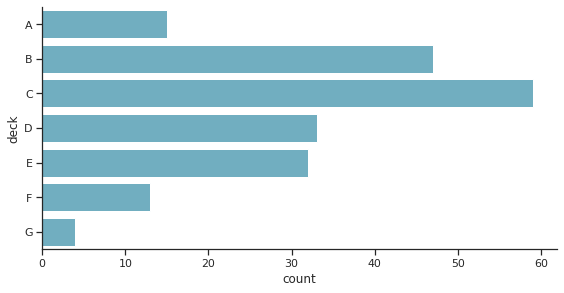

In [157]:
# aspect : 비율, 3=3배
sns.catplot(y='deck', data=titanic, kind='count', color='c',
           height=4, aspect=2)

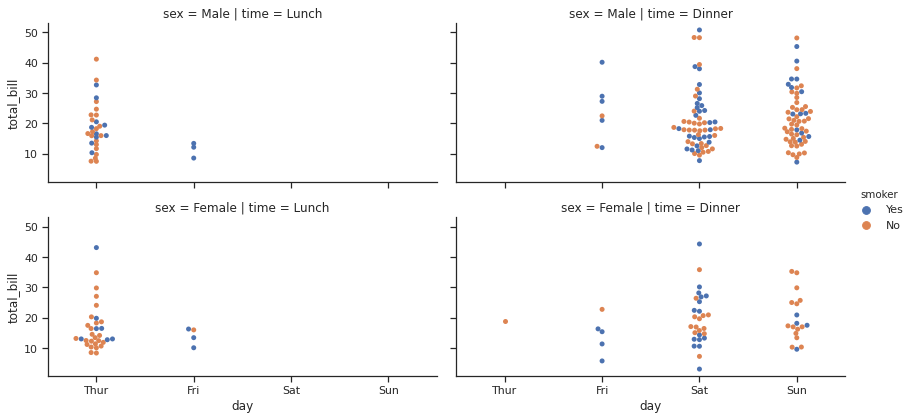

In [158]:
sns.catplot(x='day', y='total_bill', hue='smoker',
           col='time', row='sex', aspect=2, height=3,
           kind='swarm', data=tips)

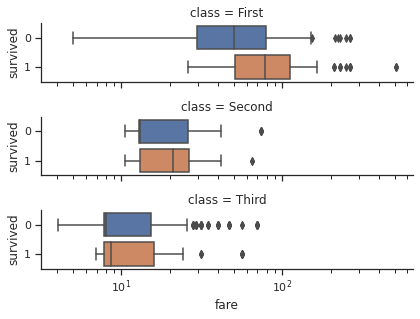

In [159]:
g = sns.catplot(x='fare', y='survived', row='class',
               kind='box', orient='h', height=1.5, aspect=4,
               data=titanic.query('fare > 0'))
g.set(xscale='log')

# Visualizing linear relationships  

- 회귀 분석  
  관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한뒤 적합도를 측정해 내는 분석 방법  

- 선형 회귀  
  종속 변수 y와 한 개 이 상의 독립 변수 x와의 선형 상관 관계를 모델링하는 회귀 분석 기법


In [160]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
sns.set(color_codes=True)

Functions to draw linear regression models

In [162]:
tips = sns.load_dataset('tips')

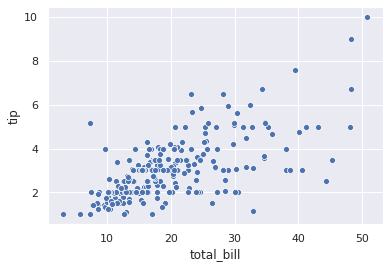

In [163]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

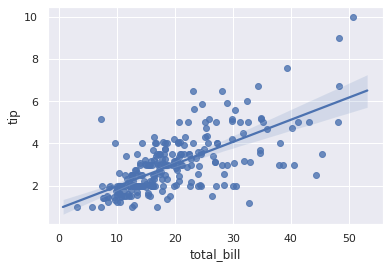

In [164]:
# 회귀선이 추가됨
sns.regplot(data=tips, x='total_bill', y='tip')

Conditioning on other variables

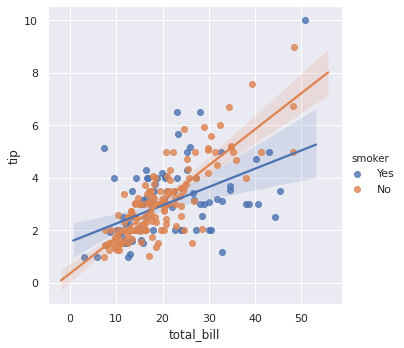

In [165]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, truncate=False)

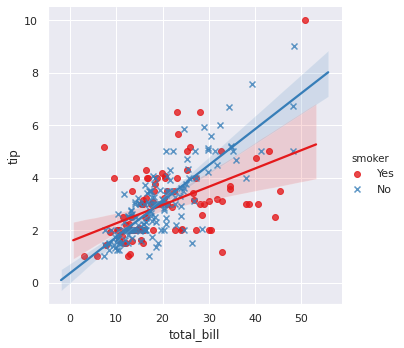

In [166]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

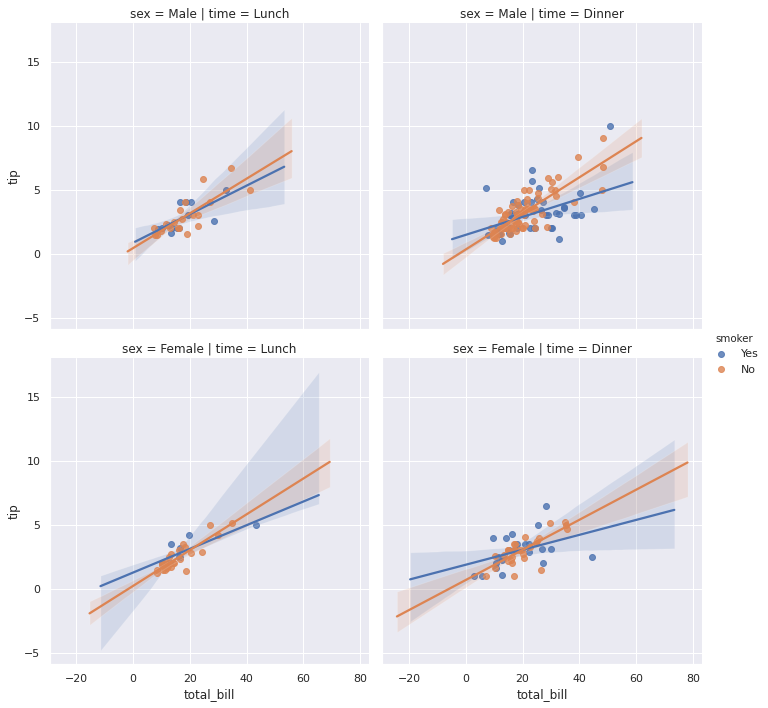

In [167]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', row='sex', data=tips)

# Controlling the size and shape of the plot

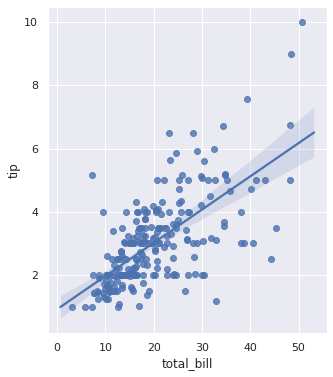

In [168]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax)

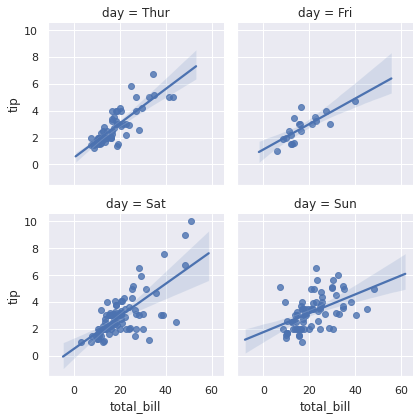

In [169]:
sns.lmplot(x='total_bill', y='tip', col='day', data=tips,
          col_wrap=2, height=3)

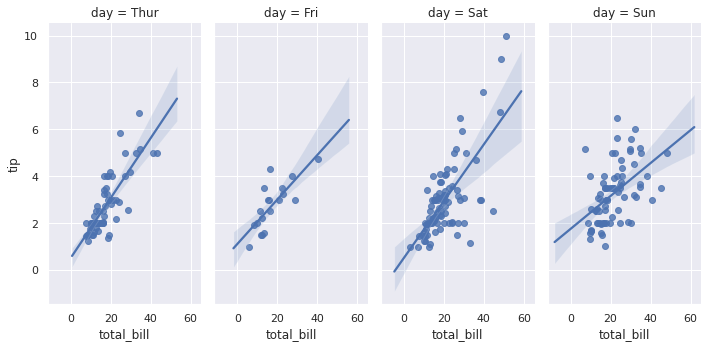

In [170]:
# aspect : 너비의 비율
sns.lmplot(x='total_bill', y='tip', col='day', data=tips, aspect=.5)

Plotting a regression in other contexts

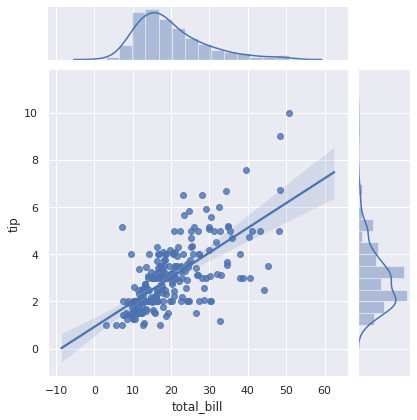

In [171]:
# 회귀선과 함께 distplot 그려줌
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

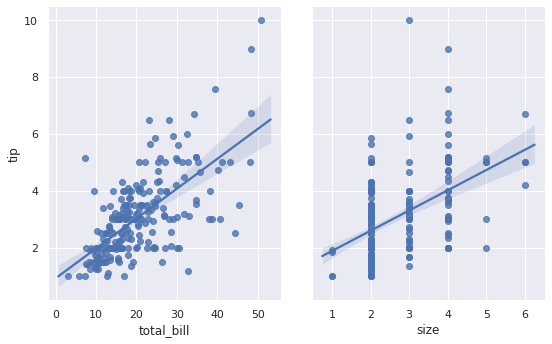

In [172]:
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=['tip'],
            height=5, aspect=.8, kind='reg')

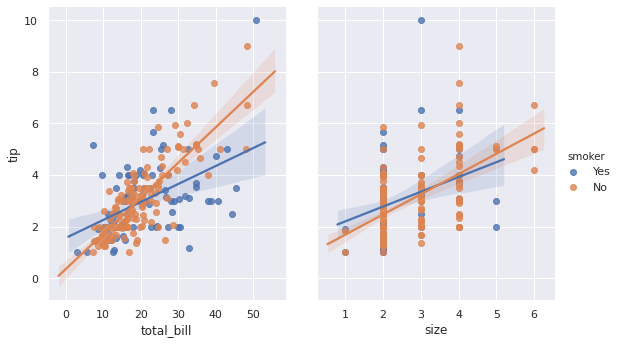

In [173]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg")